# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
# reading day.csv
data = pd.read_csv("day.csv")

In [3]:
# Printing few data from dataset
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Describing all numerical columns
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Cleaning and Mapping the Data

In [6]:
# dropping columns instant and dteday
dropcols = ["instant","dteday"]
data = data.drop(dropcols,axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Mapping seasons using data dictionary 
data["season"]= data["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Checking count of different seasons
data["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [9]:
# Mapping weathersit using data dictionary 
data['weathersit']=data['weathersit'].map({1:'weathersit_1',2:'weathersit_2',3:'weathersit_3',4:'weathersit_4'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Checking count of different weathersit
data['weathersit'].value_counts()

weathersit_1    463
weathersit_2    246
weathersit_3     21
Name: weathersit, dtype: int64

In [11]:
# Mapping Months 
data['mnth']=data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
# Checking count of different months
data['mnth'].value_counts()

July     62
Mar      62
Oct      62
Aug      62
Dec      62
Jan      62
May      62
Nov      60
June     60
Sep      60
April    60
Feb      56
Name: mnth, dtype: int64

## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

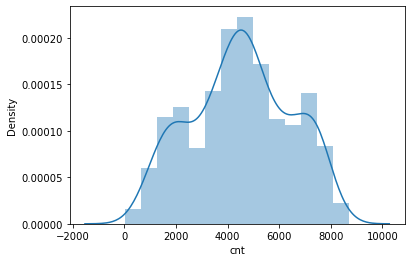

In [13]:
# Plotting Distribution plot of total count
sns.distplot(data.cnt)
plt.show()

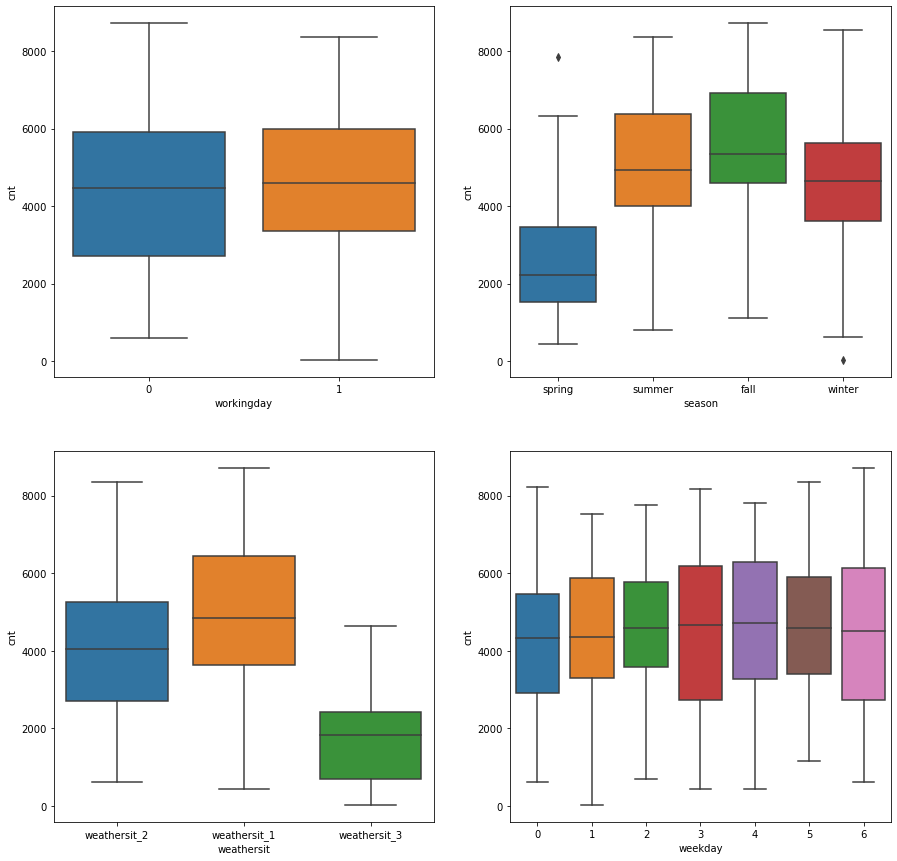

In [14]:
# Creating box plot.
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(x='workingday', y='cnt',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='season', y='cnt',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='weathersit', y='cnt',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='weekday', y='cnt',data=data)
plt.show()

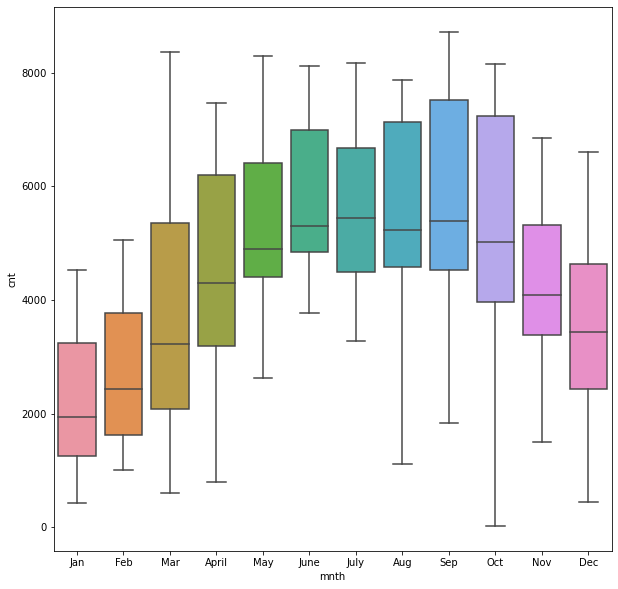

In [15]:
# Month wise variation count
plt.figure(figsize=(10,10))

sns.boxplot(x='mnth', y='cnt',data=data)
plt.show()

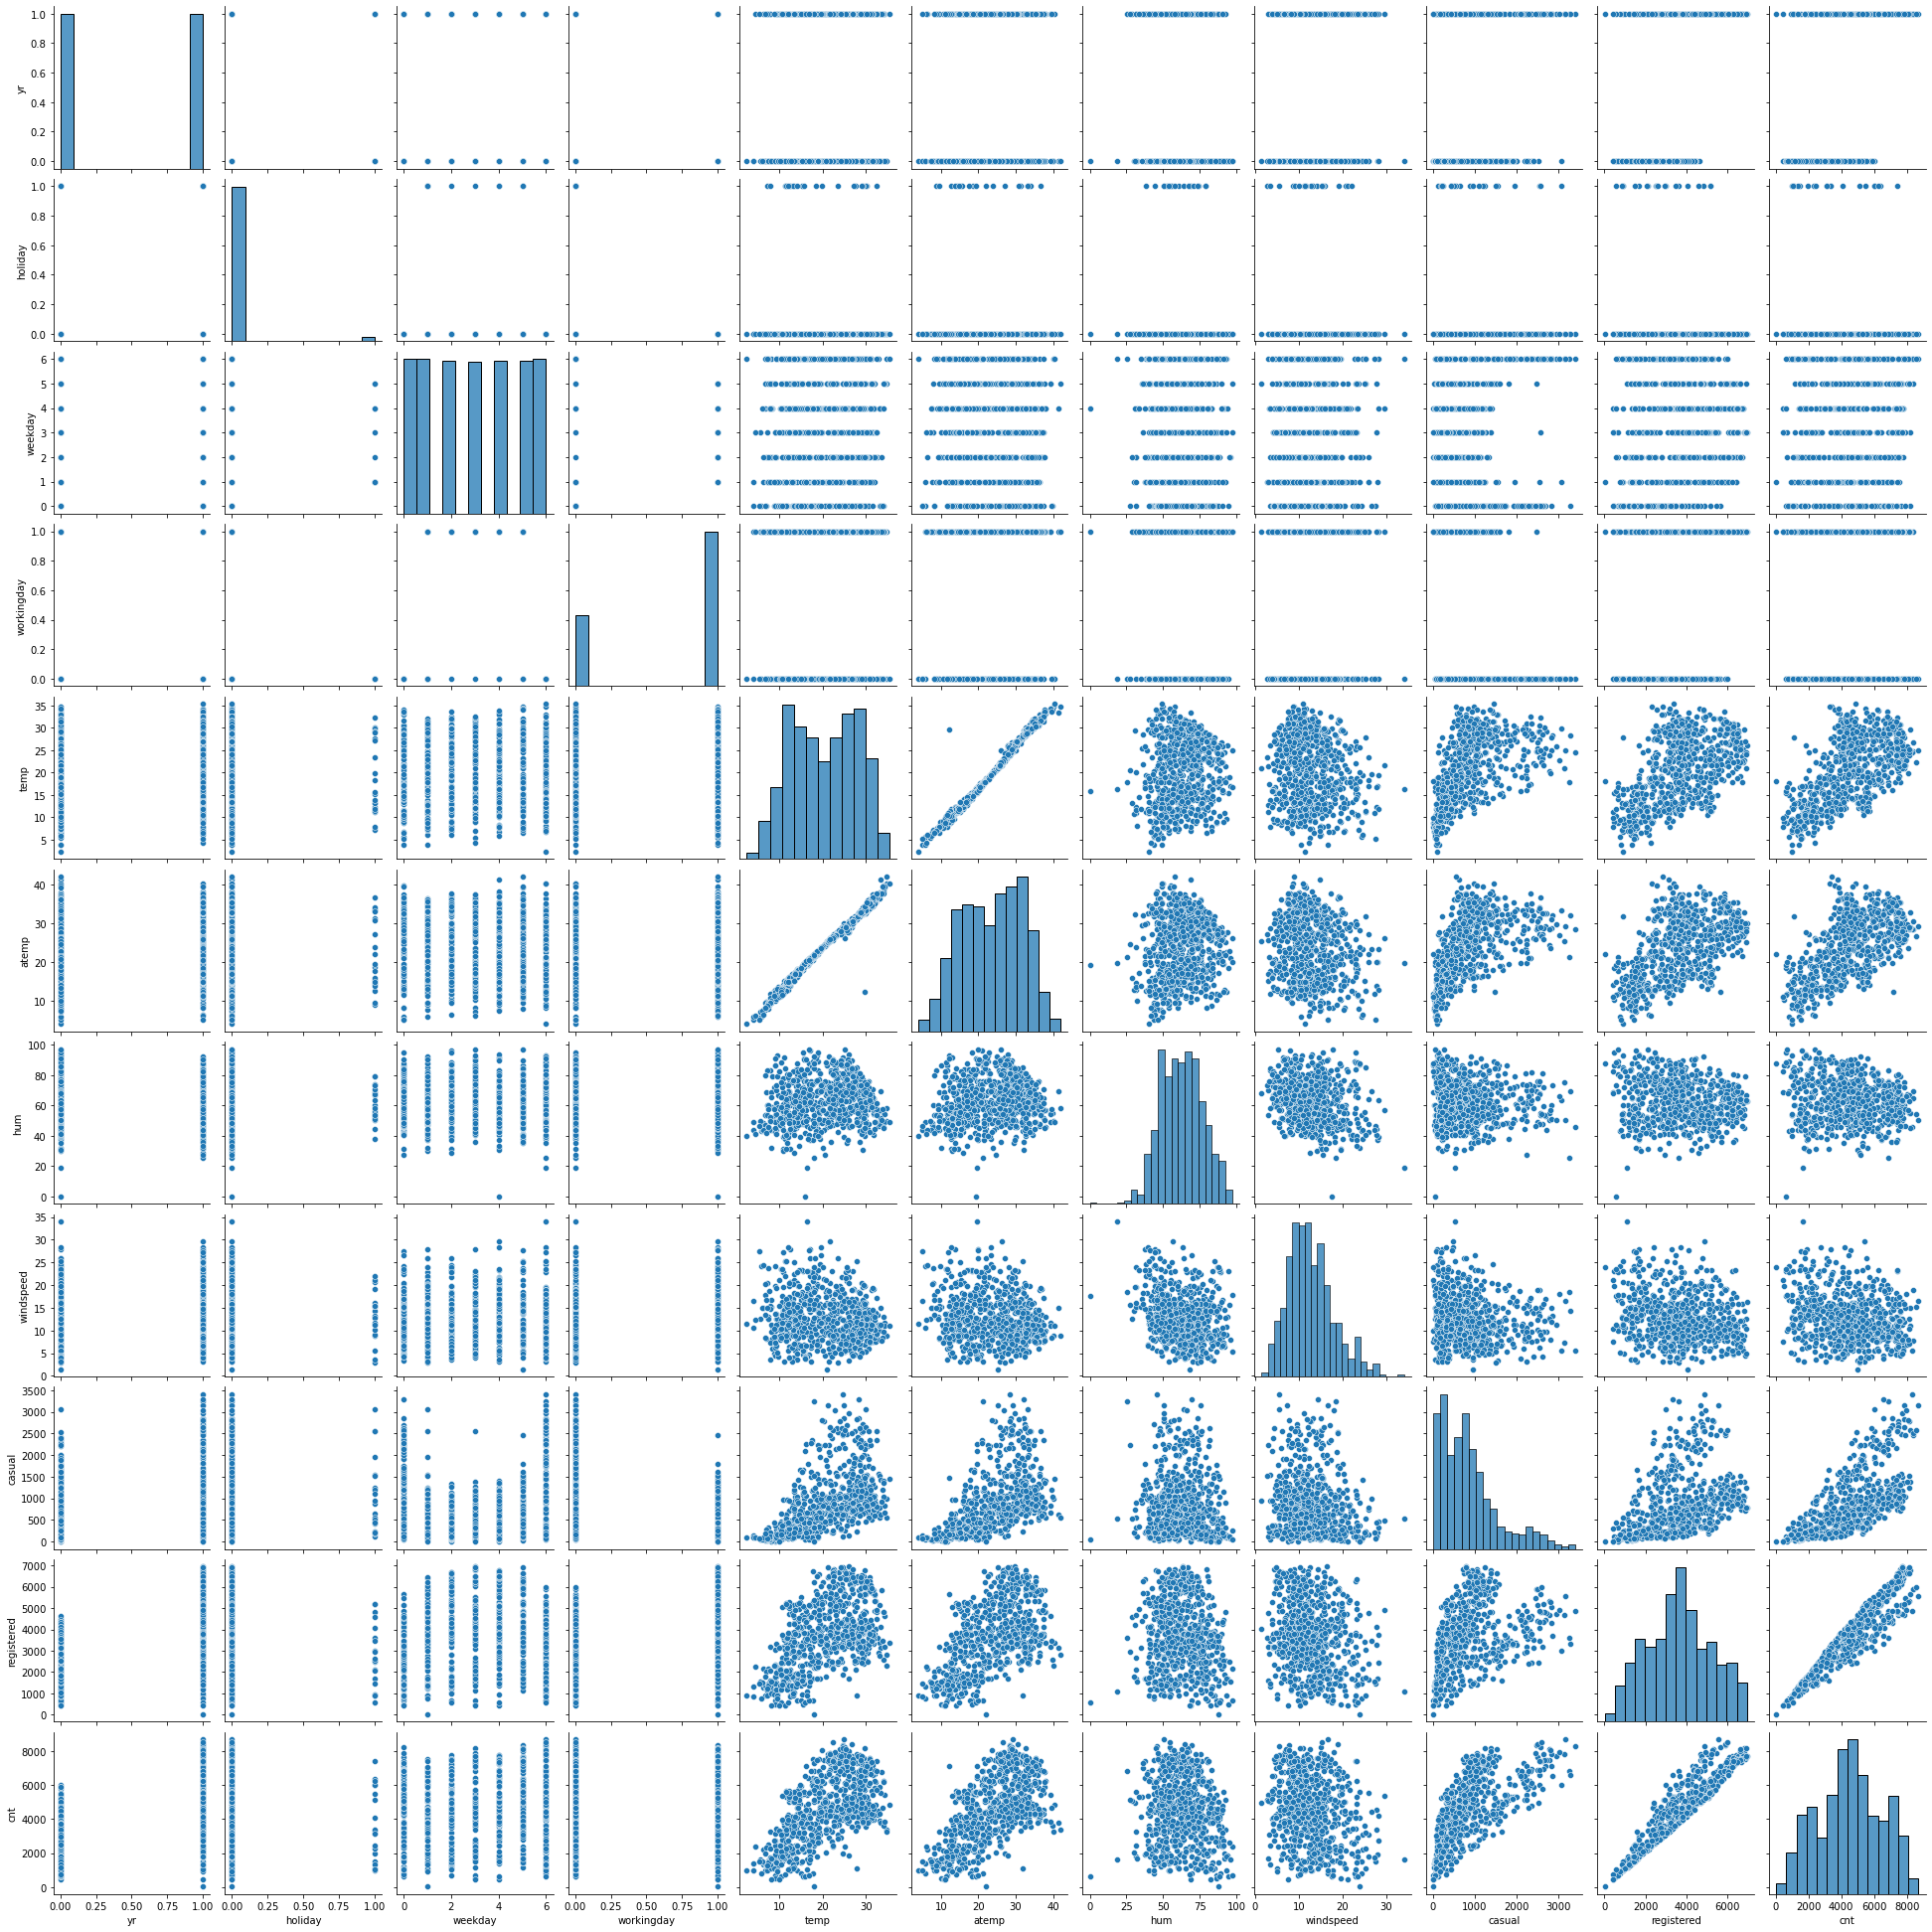

In [16]:
# Generating pair plot of all varibales
sns.pairplot(data)
plt.show()

#### Dummy Varibales

Column `season` has 4 levels. Converting them into 3 Numerical levels

In [17]:
seasons = pd.get_dummies(data['season'], drop_first = True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Concating `seasons` into main dataframe

In [18]:
data = pd.concat([data, seasons], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,spring,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,spring,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,spring,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


Column `mnth` has 12 levels. Converting them into 11 Numerical levels

In [19]:
month = pd.get_dummies(data['mnth'], drop_first = True)
month.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


Concating `month` into main dataframe

In [20]:
data = pd.concat([data, month], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


Column `weather` has 3 levels. Converting them into 2 Numerical levels

In [21]:
weather = pd.get_dummies(data['weathersit'], drop_first = True)
weather.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


Concating `weather` into main dataframe

In [22]:
data = pd.concat([data, weather], axis = 1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Jan,July,June,Mar,May,Nov,Oct,Sep,weathersit_2,weathersit_3
0,spring,0,Jan,0,6,0,weathersit_2,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,0,0,1,0
1,spring,0,Jan,0,0,0,weathersit_2,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,1,1,weathersit_1,8.050924,9.47025,43.7273,...,1,0,0,0,0,0,0,0,0,0
3,spring,0,Jan,0,2,1,weathersit_1,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,spring,0,Jan,0,3,1,weathersit_1,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,0,0,0


#### Dropping `season,mnth and weathersit` columns

In [23]:
dropcolumns = ["season","mnth","weathersit"]
data = data.drop(dropcolumns,axis=1)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Jan,July,June,Mar,May,Nov,Oct,Sep,weathersit_2,weathersit_3
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,1,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,1,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,1,0,0,0,0,0,0,0,0,0


In [24]:
## Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   weekday       730 non-null    int64  
 3   workingday    730 non-null    int64  
 4   temp          730 non-null    float64
 5   atemp         730 non-null    float64
 6   hum           730 non-null    float64
 7   windspeed     730 non-null    float64
 8   casual        730 non-null    int64  
 9   registered    730 non-null    int64  
 10  cnt           730 non-null    int64  
 11  spring        730 non-null    uint8  
 12  summer        730 non-null    uint8  
 13  winter        730 non-null    uint8  
 14  Aug           730 non-null    uint8  
 15  Dec           730 non-null    uint8  
 16  Feb           730 non-null    uint8  
 17  Jan           730 non-null    uint8  
 18  July          730 non-null    

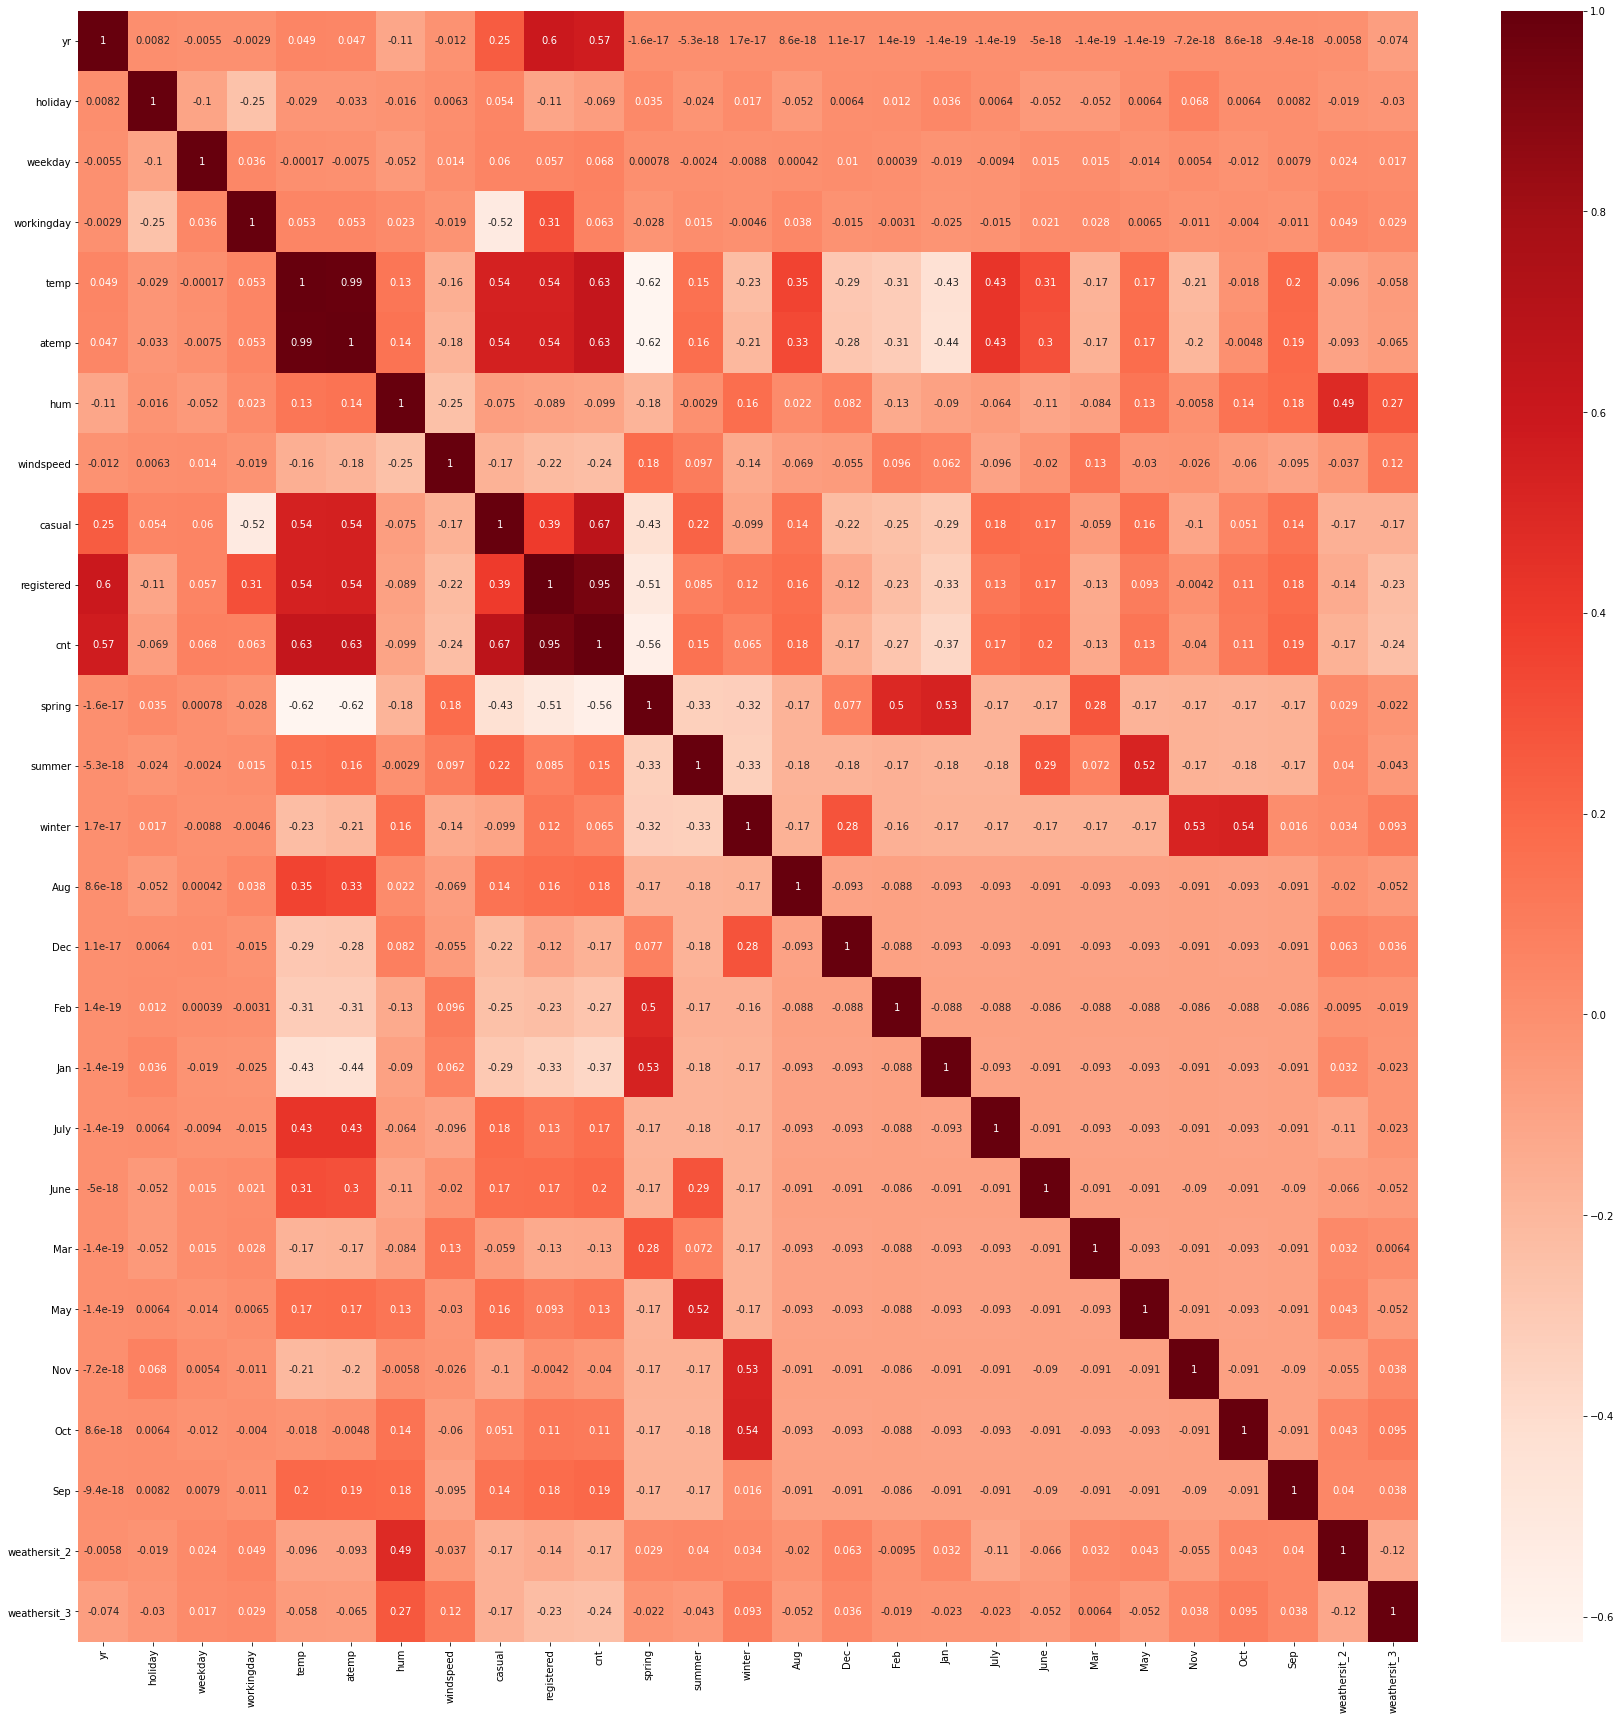

In [25]:
## Heat map Plot
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap='Reds',annot=True)
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [26]:
df_train, df_test = train_test_split(data, train_size = 0.7, random_state = 100)

Printing shape of original dataset, train dataset & test dataset

In [27]:
print(data.shape)
print(df_train.shape)
print(df_test.shape)

(730, 27)
(510, 27)
(220, 27)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [28]:
scaler = MinMaxScaler()

In [29]:
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Jan,July,June,Mar,May,Nov,Oct,Sep,weathersit_2,weathersit_3
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,1,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,1,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,1,0,0,0,0,0,0,0,0,0


Selecting and Rescaling variables  

In [30]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
# describing dataset
df_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Jan,July,June,Mar,May,Nov,Oct,Sep,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,2.990196,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,...,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.345098,0.029412
std,0.500429,0.157763,2.017093,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,...,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


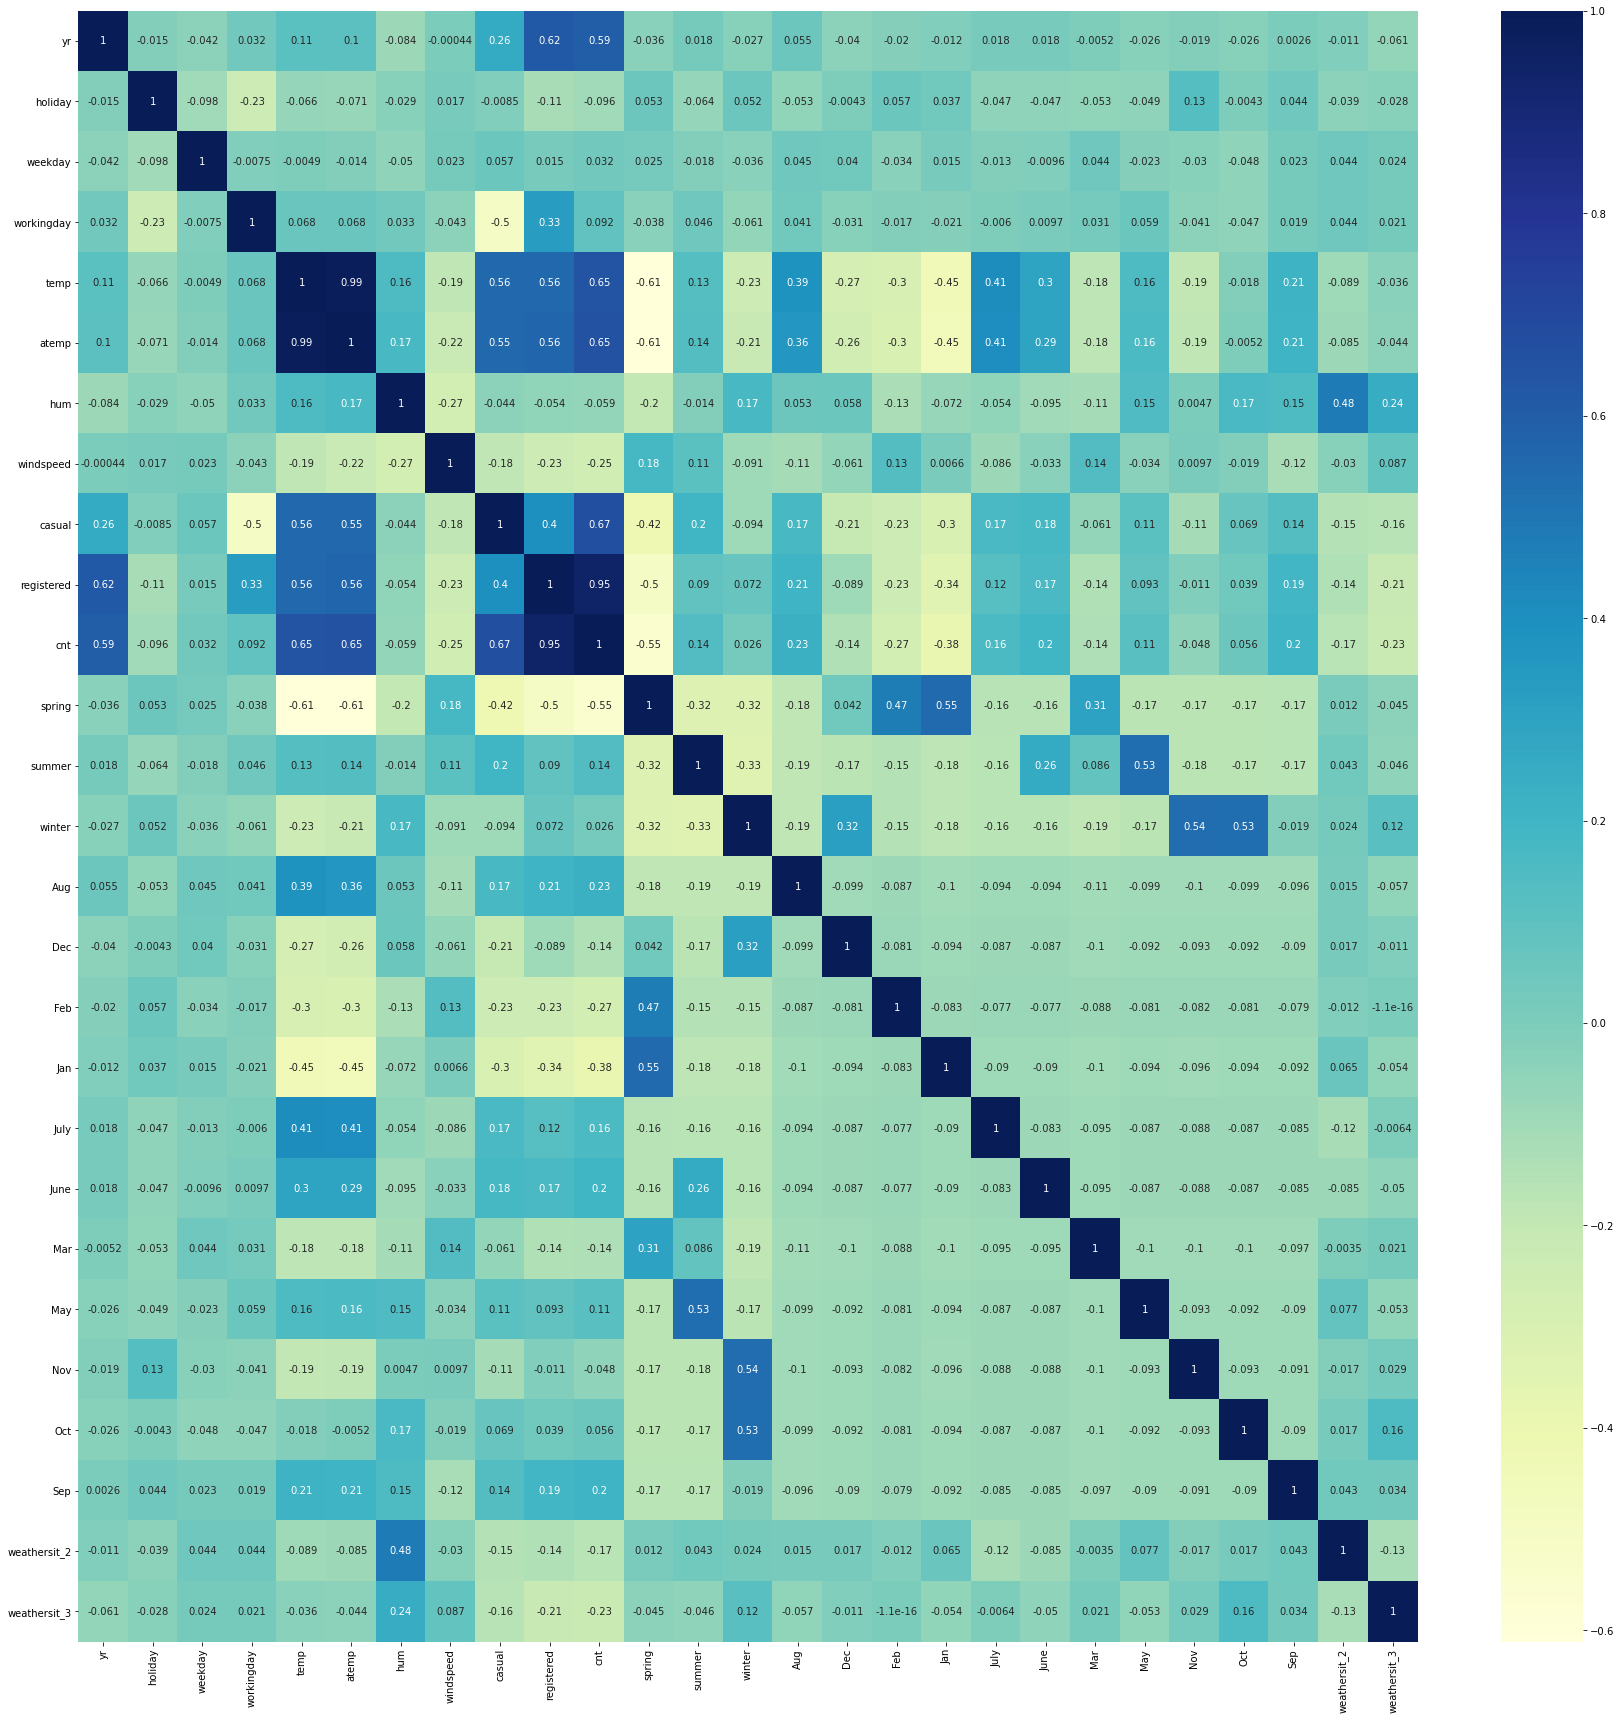

In [32]:
## Plotting Heat Map 
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [33]:
y_train=df_train.pop('cnt')
X_train=df_train

#### Dropping `casual & registered` as these varibles sum to give total count and Problem statement states to get total count

In [34]:
X_train.drop(['casual','registered'],axis=1,inplace=True)

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [35]:
# Model Building taking 15 variables in the beginning using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 7),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('Mar', False, 10),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [37]:
# Significant columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [38]:
# Insigninficant Columns
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'Aug', 'Feb', 'June', 'Mar', 'May',
       'Oct'],
      dtype='object')

### Model 1

In [39]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.15e-189
Time:                        13:18:59   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2800.5481    313.638      8.929      0.000    2184.318    3416.778
yr            2002.6712     70.301     28.487      0.000    1864.546    2140.797
holiday       -791.7451    222.606     -3.557      0.000   -1229.117    -354.373
temp          4185.2249    321.809     13.005      0.000    3552.941    4817.508
hum          -1409.9524    328.554     -4.291      0.000   -2055.488    -764.417
windspeed    -1640.4063    224.254     -7.315      0.000   -2081.016   -1199.797
spring        -532.4268    184.787     -2.881      0.004    -895.493    -169.361
summer         367.9926    133.261      2.761      0.006     106.164     629.821
winter         885.8941    156.623      5.656      0.000     578.164    1193.624
Dec           -308.2242    152.257     -2.024      0.043    -607.376      -9.073
Jan           -377.3279    157.664     -2.393      0.017    -687.103     -67.553
July          -480.2336    158.510     -3.030      0.003    -791.671    -168.796
Nov           -336.3909    163.550     -2.057      0.040    -657.730     -15.052
Sep            655.9623    146.875      4.466      0.000     367.385     944.539
weathersit_2  -471.9772     90.863     -5.194      0.000    -650.503    -293.452
weathersit_3 -2142.4134    229.612     -9.331      0.000   -2593.550   -1691.277
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [41]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
13,weathersit_2,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


In [42]:
## dropping hum for high VIF
X_train_new = X_train_rfe.drop("hum",axis =1)

### Model 2

In [43]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.75e-186
Time:                        13:18:59   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8272.
Df Residuals:                     495   BIC:                             8335.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2151.7943    279.592      7.696      0.000    1602.460    2701.128
yr            2037.8822     71.038     28.687      0.000    1898.309    2177.456
holiday       -797.7182    226.484     -3.522      0.000   -1242.707    -352.729
temp          3813.3243    315.326     12.093      0.000    3193.783    4432.866
windspeed    -1377.5254    219.487     -6.276      0.000   -1808.767    -946.283
spring        -619.3661    186.877     -3.314      0.001    -986.535    -252.197
summer         303.2676    134.714      2.251      0.025      38.586     567.949
winter         755.1870    156.313      4.831      0.000     448.069    1062.305
Dec           -372.0714    154.171     -2.413      0.016    -674.982     -69.161
Jan           -434.6653    159.837     -2.719      0.007    -748.707    -120.623
July          -434.9981    160.917     -2.703      0.007    -751.164    -118.833
Nov           -343.4459    166.394     -2.064      0.040    -670.371     -16.521
Sep            597.3994    148.790      4.015      0.000     305.061     889.738
weathersit_2  -695.9941     75.668     -9.198      0.000    -844.665    -547.323
weathersit_3 -2535.8856    214.182    -11.840      0.000   -2956.704   -2115.067
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,July,1.59
12,weathersit_2,1.57


In [45]:
# Dropping nov for High P value
X_train_new = X_train_new.drop("Nov",axis =1)

### Model 3

In [46]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.74e-186
Time:                        13:18:59   Log-Likelihood:                -4123.1
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2006.1375    271.428      7.391      0.000    1472.847    2539.428
yr            2036.3174     71.267     28.573      0.000    1896.295    2176.340
holiday       -853.4929    225.604     -3.783      0.000   -1296.751    -410.235
temp          3981.8704    305.568     13.031      0.000    3381.502    4582.238
windspeed    -1385.1931    220.176     -6.291      0.000   -1817.786    -952.600
spring        -549.2615    184.367     -2.979      0.003    -911.498    -187.025
summer         350.8949    133.159      2.635      0.009      89.270     612.519
winter         673.0560    151.659      4.438      0.000     375.082     971.030
Dec           -245.7227    141.962     -1.731      0.084    -524.644      33.199
Jan           -392.2544    159.031     -2.467      0.014    -704.711     -79.798
July          -433.5686    161.444     -2.686      0.007    -750.767    -116.370
Sep            644.9013    147.482      4.373      0.000     355.135     934.668
weathersit_2  -689.4059     75.849     -9.089      0.000    -838.431    -540.381
weathersit_3 -2501.8066    214.246    -11.677      0.000   -2922.747   -2080.866
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
8,Jan,1.65
9,July,1.59
11,weathersit_2,1.57
10,Sep,1.34


In [48]:
#Dropping Dec column because high P value
X_train_new = X_train_new.drop("Dec",axis =1)

### Model 4

In [49]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
#Let's see the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.14e-187
Time:                        13:18:59   Log-Likelihood:                -4124.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1894.1837    264.138      7.171      0.000    1375.220    2413.148
yr            2036.3860     71.410     28.517      0.000    1896.083    2176.689
holiday       -841.0190    225.941     -3.722      0.000   -1284.937    -397.101
temp          4103.6239    297.959     13.772      0.000    3518.210    4689.038
windspeed    -1346.5329    219.480     -6.135      0.000   -1777.755    -915.310
spring        -536.2630    184.584     -2.905      0.004    -898.924    -173.602
summer         377.1062    132.560      2.845      0.005     116.659     637.554
winter         657.5914    151.699      4.335      0.000     359.540     955.643
Jan           -332.5431    155.555     -2.138      0.033    -638.170     -26.916
July          -437.6201    161.751     -2.706      0.007    -755.420    -119.820
Sep            664.0616    147.361      4.506      0.000     374.534     953.589
weathersit_2  -689.0769     76.001     -9.067      0.000    -838.400    -539.754
weathersit_3 -2480.9146    214.334    -11.575      0.000   -2902.028   -2059.801
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,Jan,1.61
8,July,1.59
10,weathersit_2,1.56
9,Sep,1.34


In [51]:
#Dropping Jan Column because of P value
X_train_new = X_train_new.drop("Jan",axis =1)

### Model 5

In [52]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model
#Let's see the summary of our linear model
(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.06e-187
Time:                        13:18:59   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1755.4766    256.961      6.832      0.000    1250.616    2260.337
yr            2030.1924     71.607     28.352      0.000    1889.504    2170.881
holiday       -847.1493    226.732     -3.736      0.000   -1292.618    -401.681
temp          4267.6654    288.938     14.770      0.000    3699.977    4835.354
windspeed    -1285.7110    218.407     -5.887      0.000   -1714.823    -856.599
spring        -583.8330    183.893     -3.175      0.002    -945.135    -222.531
summer         404.0685    132.431      3.051      0.002     143.876     664.261
winter         710.4969    150.203      4.730      0.000     415.388    1005.606
July          -452.4804    162.180     -2.790      0.005    -771.121    -133.840
Sep            667.9479    147.877      4.517      0.000     377.408     958.488
weathersit_2  -696.8079     76.187     -9.146      0.000    -846.495    -547.121
weathersit_3 -2470.2587    215.043    -11.487      0.000   -2892.762   -2047.755
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,July,1.58
9,weathersit_2,1.55
8,Sep,1.34
10,weathersit_3,1.08


#### We have Not dropped temp as we know temp plays a important role in Bike sharing

## Making Predictions

In [54]:
y_train_price = lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

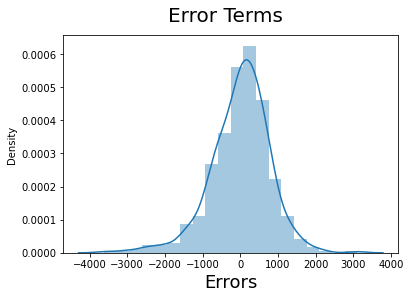

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Applying the scaling on the test sets

In [56]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [59]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

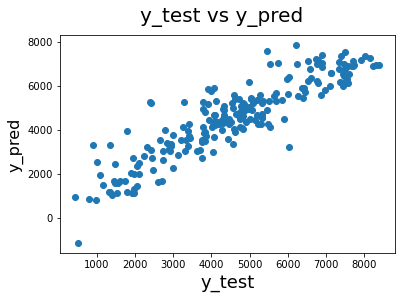

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## R2 Score

In [61]:
# R2 score for test data
r2=r2_score(y_test,y_pred)
r2

0.8052680349048552